In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pandas import DataFrame, Series

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
fraud_data = pd.read_csv("C:/Users/Shree/anaconda/.keras/Fraud/Fraud_Data.csv")

In [6]:
ip_address=pd.read_csv("C:/Users/Shree/anaconda/.keras/Fraud/IpAddress_to_Country.csv")

In [7]:
fraud_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [8]:
ip_address.head(10)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [9]:
len(fraud_data) == len(ip_address)

False

In [10]:
fraud_data.shape

(151112, 11)

In [11]:
ip_address.shape

(138846, 3)

In [12]:
country = len(fraud_data) * [0]

for ind, row in fraud_data.iterrows():
    temp = ip_address[(ip_address['lower_bound_ip_address'] < row['ip_address']) & 
           (ip_address['upper_bound_ip_address'] > row['ip_address'])]['country']
    
    if len(temp) == 1:
        country[ind] = temp.values[0]

fraud_data['country'] = country

In [13]:
fraud_data.to_csv('DF_Data.csv')
data = pd.read_csv('DF_Data.csv')
data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [14]:
data = data.drop('Unnamed: 0', axis = 1)

In [15]:
data.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
country            object
dtype: object

In [16]:
data.describe().transpose

<bound method DataFrame.transpose of              user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  >

In [17]:
data['signup_time'] = pd.to_datetime(data['signup_time'])
data['purchase_time'] = pd.to_datetime(data['purchase_time'])

In [18]:
data['country'].describe()

count            151112
unique              182
top       United States
freq              58049
Name: country, dtype: object

In [19]:
data['source'].describe()

count     151112
unique         3
top          SEO
freq       60615
Name: source, dtype: object

In [20]:
data['diff_time'] = (data['purchase_time'] - data['signup_time'])/np.timedelta64(1, 's')

In [21]:
device_user_count = len(data) * [0]
device_count = data.groupby('device_id')['user_id'].count()
device_user_count = device_count[data['device_id']]
device_user_count = device_user_count.reset_index().drop('device_id', axis = 1)
device_user_count.columns = ['device_user_count']
data = pd.concat([data, device_user_count], axis = 1)

In [22]:
ip_count = data.groupby('ip_address')['user_id'].count()
ip_count = ip_count[data['ip_address']].reset_index().drop('ip_address', axis = 1)
ip_count.columns = ['ip_count']
data = pd.concat([data, ip_count], axis = 1)

In [23]:
temp = data.groupby('country')[['user_id']].count().sort_values('user_id', ascending = False)
temp = temp.iloc[:60,:].loc[data['country']].reset_index()
temp.loc[temp.isnull().any(axis = 1), 'country'] = 'other'
temp.loc[temp['country'] == '0','country'] = 'other'
temp = temp.drop('user_id', axis = 1)
temp.columns = ['country_revised']
data = pd.concat([data, temp], axis = 1)
data = data.drop('country', axis = 1)

C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [24]:
data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,diff_time,device_user_count,ip_count,country_revised
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4506682.0,1,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,17944.0,1,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.0,12,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,492085.0,1,1,other
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,4361461.0,1,1,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,4240931.0,1,1,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,2177825.0,1,1,other
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,4268729.0,1,1,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,3594200.0,1,1,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,4943753.0,1,1,United States


In [25]:
y = data['class']

In [26]:
data = data.drop(['user_id', 'signup_time','purchase_time','class'], axis = 1)

In [27]:
data.isnull().sum()

purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age                  0
ip_address           0
diff_time            0
device_user_count    0
ip_count             0
country_revised      0
dtype: int64

In [28]:
lb = LabelEncoder()
data['device_id'] = lb.fit_transform(data['device_id'])
data['source'] = lb.fit_transform(data['source'])
data['browser'] = lb.fit_transform(data['browser'])
data['sex'] = lb.fit_transform(data['sex'])
data['country_revised'] = lb.fit_transform(data['country_revised'])

In [30]:
x = data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [32]:
pipeline = Pipeline(steps = [('clf', RandomForestClassifier(criterion = 'entropy'))])

In [33]:
clf_forest = RandomForestClassifier(n_estimators= 20, criterion = 'entropy', max_depth= 50, min_samples_leaf= 3,min_samples_split= 3, oob_score= True)

In [34]:
clf_forest.fit(x_train, y_train)

C:\Users\Shree\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shree\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
preds = clf_forest.predict(x_test)
preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34272
           1       0.98      0.54      0.70      3506

    accuracy                           0.96     37778
   macro avg       0.97      0.77      0.84     37778
weighted avg       0.96      0.96      0.95     37778



In [37]:
clf_forest.feature_importances_

array([0.06026283, 0.07849463, 0.01123208, 0.01912332, 0.00838527,
       0.05055026, 0.07833541, 0.27711544, 0.22097303, 0.16528481,
       0.03024294])

In [38]:
data.columns.values[:-1]

array(['purchase_value', 'device_id', 'source', 'browser', 'sex', 'age',
       'ip_address', 'diff_time', 'device_user_count', 'ip_count'],
      dtype=object)

In [39]:
clf_forest.oob_score_

0.95504438209187

In [40]:
prob_score = clf_forest.predict_proba(x_test)
prob_score = DataFrame(prob_score).iloc[:,0]

In [41]:
fpr,tpr,thresholds = roc_curve(y_test,1-prob_score)

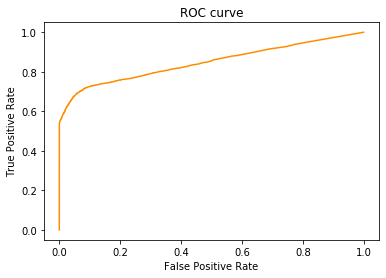

In [42]:
plt.plot(fpr,tpr, color = 'darkorange')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [43]:
tpr

array([0.        , 0.45864233, 0.45892755, ..., 0.94409584, 0.94409584,
       1.        ])

In [44]:
fpr

array([0.        , 0.        , 0.        , ..., 0.79225023, 0.79260037,
       1.        ])

In [45]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.97058824e-01, ...,
       6.02409639e-04, 3.90625000e-04, 0.00000000e+00])

In [46]:
i = np.arange(len(fpr))
roc = DataFrame({'fpr' : Series(fpr, index=i),'tpr' : Series(tpr, index = i), '1-fpr' : Series(1-fpr, index = i), 
                    'tf' : Series(tpr - (1-fpr), index = i), 'thresholds' : Series(thresholds, index = i)})
roc.iloc[(roc['tf']-0).abs().argsort()[[0]]]

,fpr,tpr,1-fpr,tf,thresholds
2263,0.233835,0.766115,0.766165,-0.00005,0.059


[]

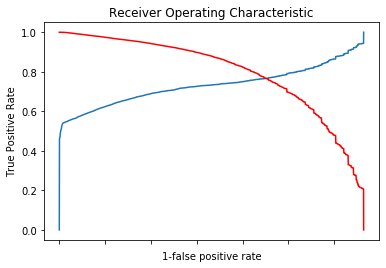

In [47]:
fig, ax = plt.subplots(1)
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-false positive rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
ax.set_xticklabels([])

In [50]:
prob = clf_forest.predict_proba(x_test)[:,1]
prob[prob > 0.06] = 1
prob[prob <= 0.06] = 0

In [51]:
prob

array([0., 0., 1., ..., 0., 0., 1.])

In [52]:
print(classification_report(y_test, prob))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     34272
           1       0.26      0.77      0.38      3506

    accuracy                           0.77     37778
   macro avg       0.61      0.77      0.62     37778
weighted avg       0.90      0.77      0.82     37778

